In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

SyntaxError: ignored

In [ ]:
# def cv2_imshow(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     plt.show()

# Uczenie głębokie

## MLP

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

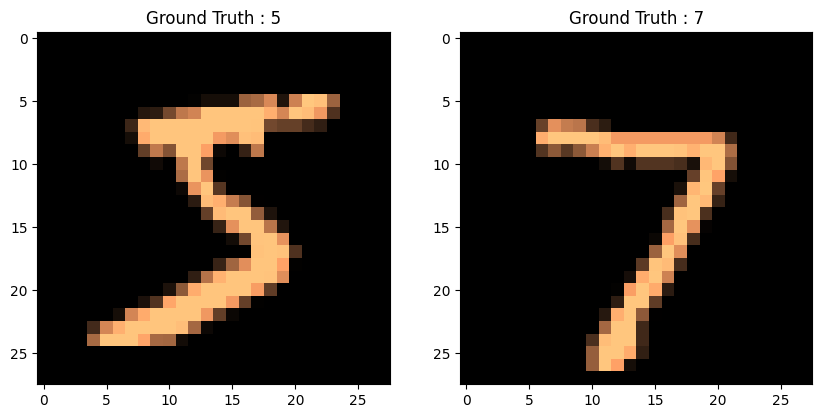

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape : ', train_x.shape, train_y.shape) 
print('Testing data shape : ', test_x.shape, test_y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num) 
print('Output classes : ', classes)
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper') 
plt.title("Ground Truth : {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper') 
plt.title("Ground Truth : {}".format(test_y[0]))

In [ ]:
 # Change from matrix to array of dimension 28x28 to array of dimension 784
train_x = train_x.reshape(train_x.shape[0], -1) 
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255 
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y) 
test_y_one_hot = to_categorical(test_y)

print(train_y[0])
print(train_y_one_hot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=10, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

Epoch 1/10
235/235 [==============================] - 6s 8ms/step - loss: 0.3292 - accuracy: 0.9033 - val_loss: 0.1496 - val_accuracy: 0.9538
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1267 - accuracy: 0.9616 - val_loss: 0.0991 - val_accuracy: 0.9698
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0813 - accuracy: 0.9751 - val_loss: 0.1312 - val_accuracy: 0.9569
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0763 - val_accuracy: 0.9745
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0707 - val_accuracy: 0.9783
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.1094 - val_accuracy: 0.9661
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0665 - val_accuracy: 0.9807
Epoch 

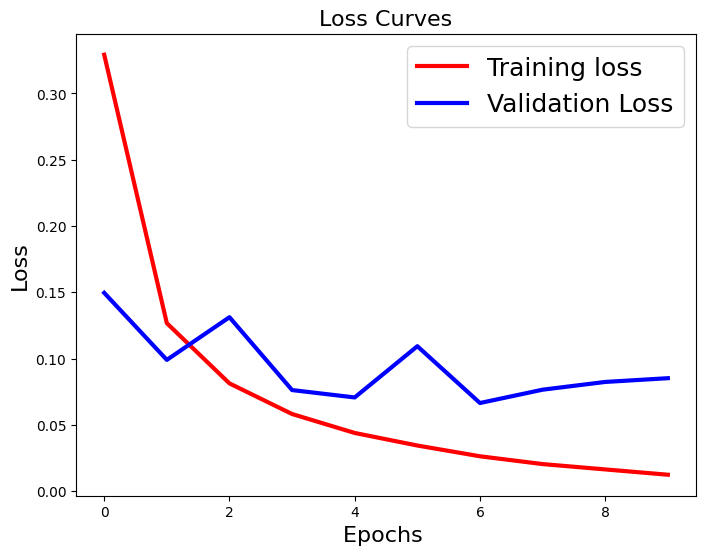

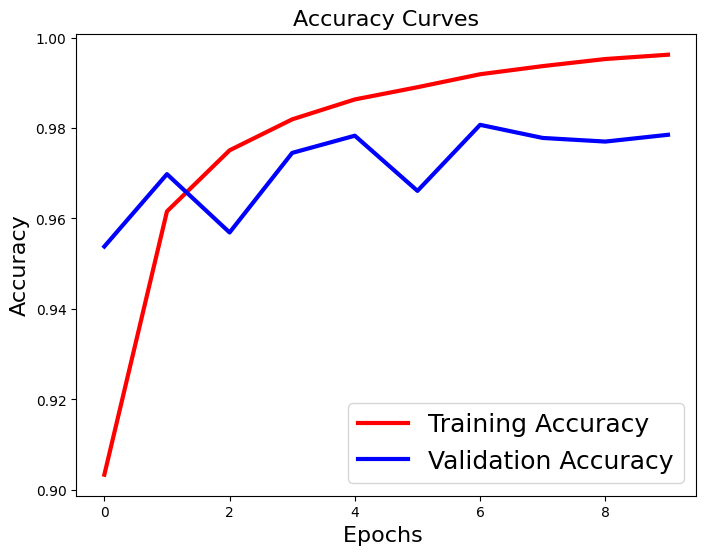

In [ ]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)


plot_history(history)

## Cifar10

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

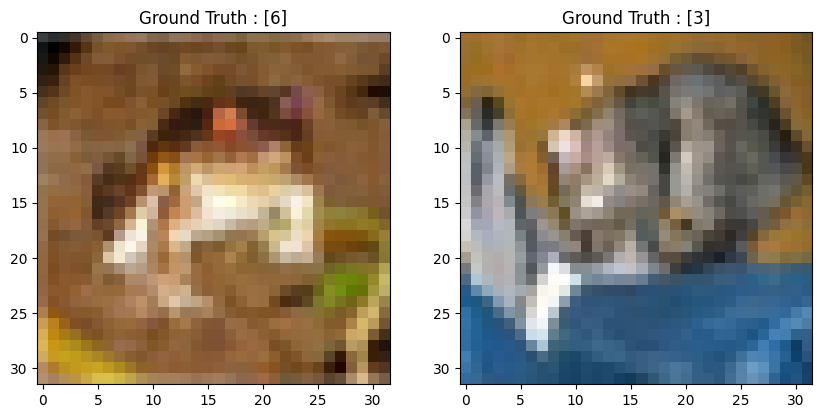

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

print('Training data shape : ', train_x.shape, train_y.shape) 
print('Testing data shape : ', test_x.shape, test_y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num) 
print('Output classes : ', classes)
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='gray') 
plt.title("Ground Truth : {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='gray') 
plt.title("Ground Truth : {}".format(test_y[0]))

In [ ]:
train_x[0].shape

(32, 32, 3)

In [ ]:
import tensorflow as tf

for i in range(len(train_x)):
    train_x[i] = tf.image.rgb_to_grayscale(train_x[i])
for i in range(len(test_x)):
    test_x[i] = tf.image.rgb_to_grayscale(test_x[i])

# Change from matrix to array of dimension 32x32 to array of dimension 1024
train_x = train_x.reshape(train_x.shape[0], -1) 
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255 
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y) 
test_y_one_hot = to_categorical(test_y)

print(train_y[0])
print(train_y_one_hot[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=30, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

Epoch 1/30
196/196 [==============================] - 2s 8ms/step - loss: 2.2667 - accuracy: 0.2006 - val_loss: 2.0530 - val_accuracy: 0.2552
Epoch 2/30
196/196 [==============================] - 1s 6ms/step - loss: 2.0078 - accuracy: 0.2742 - val_loss: 1.9844 - val_accuracy: 0.2670
Epoch 3/30
196/196 [==============================] - 1s 6ms/step - loss: 1.9301 - accuracy: 0.3086 - val_loss: 1.8768 - val_accuracy: 0.3359
Epoch 4/30
196/196 [==============================] - 1s 6ms/step - loss: 1.8817 - accuracy: 0.3273 - val_loss: 1.9083 - val_accuracy: 0.3070
Epoch 5/30
196/196 [==============================] - 1s 6ms/step - loss: 1.8418 - accuracy: 0.3436 - val_loss: 1.9379 - val_accuracy: 0.2980
Epoch 6/30
196/196 [==============================] - 1s 7ms/step - loss: 1.8042 - accuracy: 0.3593 - val_loss: 1.8235 - val_accuracy: 0.3582
Epoch 7/30
196/196 [==============================] - 1s 8ms/step - loss: 1.7746 - accuracy: 0.3660 - val_loss: 1.8705 - val_accuracy: 0.3205
Epoch 

In [ ]:
train_x.shape[1]

3072

## Pierwszy CNN

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

# 0-255 to 0-1
train_x = train_x/255 
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y) 
test_y_one_hot = to_categorical(test_y)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

#budowa modelu
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same',
                 input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#kompilacja modelu
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#trenowanie
history = model.fit(train_x, train_y_one_hot,
                   batch_size=64, epochs=30, verbose=True,
                   validation_data=(test_x, test_y_one_hot))



Epoch 1/30
782/782 [==============================] - 10s 9ms/step - loss: 1.6307 - accuracy: 0.4060 - val_loss: 1.3439 - val_accuracy: 0.5230
Epoch 2/30
782/782 [==============================] - 7s 8ms/step - loss: 1.1424 - accuracy: 0.5953 - val_loss: 1.0580 - val_accuracy: 0.6224
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 0.8926 - accuracy: 0.6847 - val_loss: 1.0004 - val_accuracy: 0.6521
Epoch 4/30
782/782 [==============================] - 7s 8ms/step - loss: 0.7485 - accuracy: 0.7382 - val_loss: 0.7842 - val_accuracy: 0.7255
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.6319 - accuracy: 0.7793 - val_loss: 0.7737 - val_accuracy: 0.7365
Epoch 6/30
782/782 [==============================] - 7s 8ms/step - loss: 0.5423 - accuracy: 0.8100 - val_loss: 0.7554 - val_accuracy: 0.7414
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.4673 - accuracy: 0.8383 - val_loss: 0.8760 - val_accuracy: 0.7377
Epoch

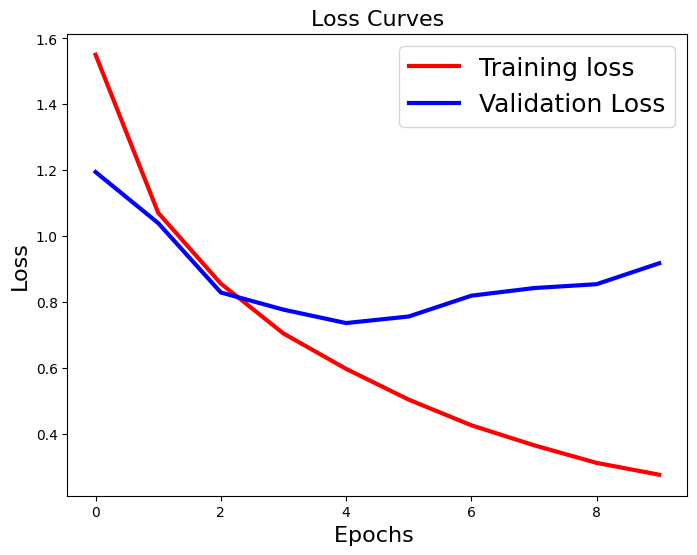

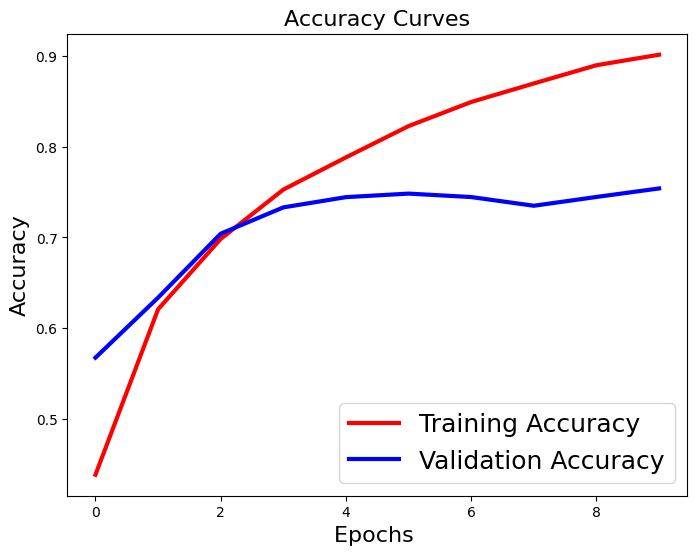

In [ ]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

plot_history(history)

## Zapobieganie przeuczeniu

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

#budowa modelu
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same',
                 input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

#kompilacja modelu
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#trenowanie
history = model.fit(train_x, train_y_one_hot,
                   batch_size=64, epochs=30, verbose=True,
                   validation_data=(test_x, test_y_one_hot))



Epoch 1/30
782/782 [==============================] - 13s 14ms/step - loss: 1.5588 - accuracy: 0.4435 - val_loss: 1.1767 - val_accuracy: 0.5759
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 1.1510 - accuracy: 0.5873 - val_loss: 0.9686 - val_accuracy: 0.6543
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.9898 - accuracy: 0.6512 - val_loss: 0.9179 - val_accuracy: 0.6755
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8846 - accuracy: 0.6871 - val_loss: 0.8017 - val_accuracy: 0.7188
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8194 - accuracy: 0.7147 - val_loss: 0.7444 - val_accuracy: 0.7400
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7637 - accuracy: 0.7342 - val_loss: 0.7677 - val_accuracy: 0.7327
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7183 - accuracy: 0.7487 - val_loss: 0.6261 - val_accuracy:

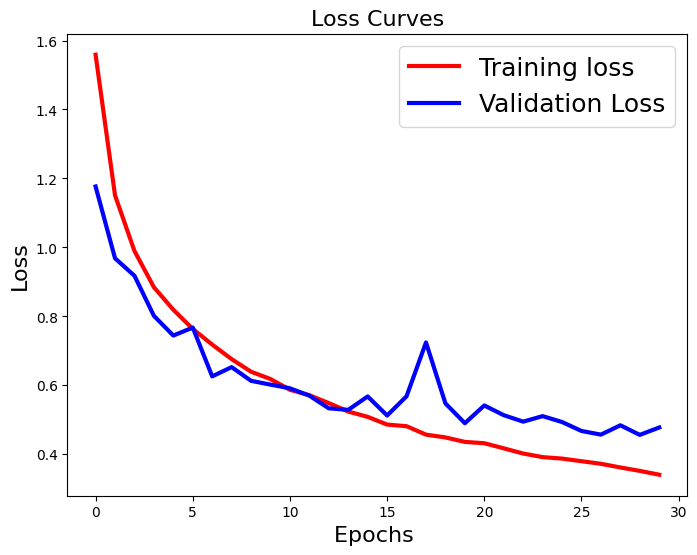

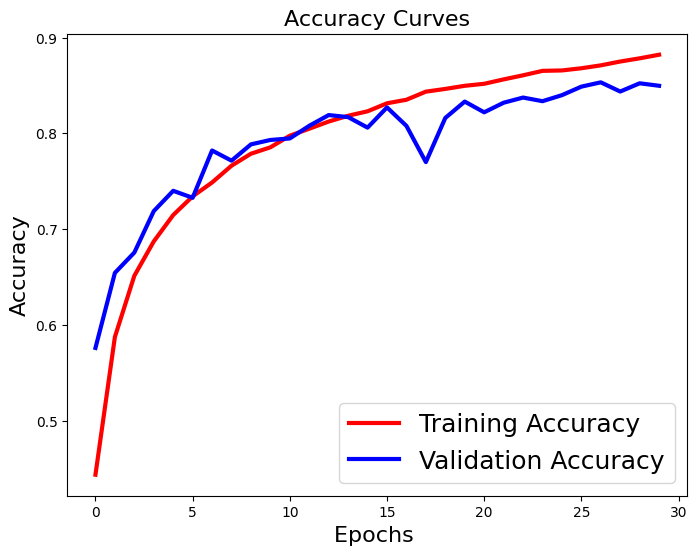

In [ ]:
plot_history(history)

## MobileNet

In [ ]:
from keras.models import Model
from tensorflow.keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(train_x.shape[1], train_x.shape[2], 3), classes=10, include_top=False, weights=None)
x=model.layers[-1].output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x) 
flatten=Flatten()(x)
predictions=Dense(10, activation='softmax')(flatten)

model = Model(inputs=model.input, outputs=predictions)

# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9) 
model.compile(optimizer=opt, loss='categorical_crossentropy' , metrics= ['accuracy'])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data= (test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 47s 41ms/step - loss: 2.6384 - accuracy: 0.2187 - val_loss: 2.5756 - val_accuracy: 0.1000
Epoch 2/30
782/782 [==============================] - 25s 32ms/step - loss: 2.6795 - accuracy: 0.1938 - val_loss: 2.4112 - val_accuracy: 0.1000
Epoch 3/30
782/782 [==============================] - 25s 32ms/step - loss: 2.6242 - accuracy: 0.1940 - val_loss: 2.4773 - val_accuracy: 0.0995
Epoch 4/30
782/782 [==============================] - 25s 33ms/step - loss: 2.3416 - accuracy: 0.2485 - val_loss: 3.0449 - val_accuracy: 0.1072
Epoch 5/30
782/782 [==============================] - 27s 35ms/step - loss: 2.2596 - accuracy: 0.2888 - val_loss: 2.4594 - val_accuracy: 0.1205
Epoch 6/30
782/782 [==============================] - 25s 32ms/step - loss: 2.1177 - accuracy: 0.3098 - val_loss: 2.2491 - val_accuracy: 0.1747
Epoch 7/30
782/782 [==============================] - 25s 32ms/step - loss: 2.2331 - accuracy: 0.2651 - val_loss: 2.6198 - val_accuracy:

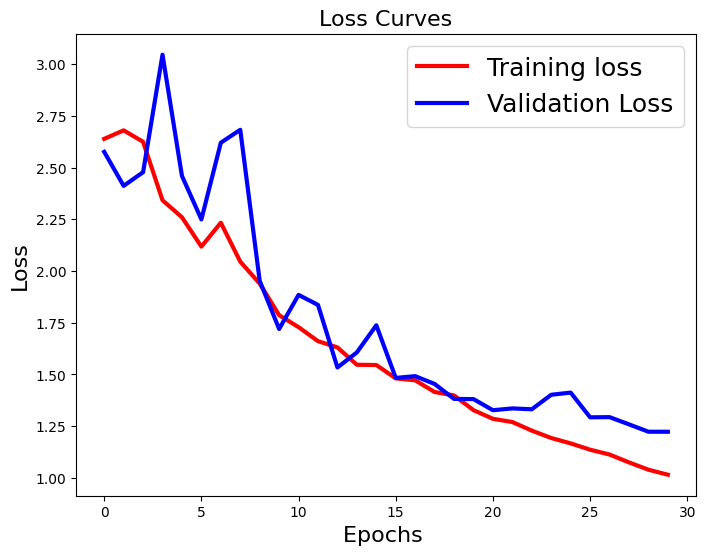

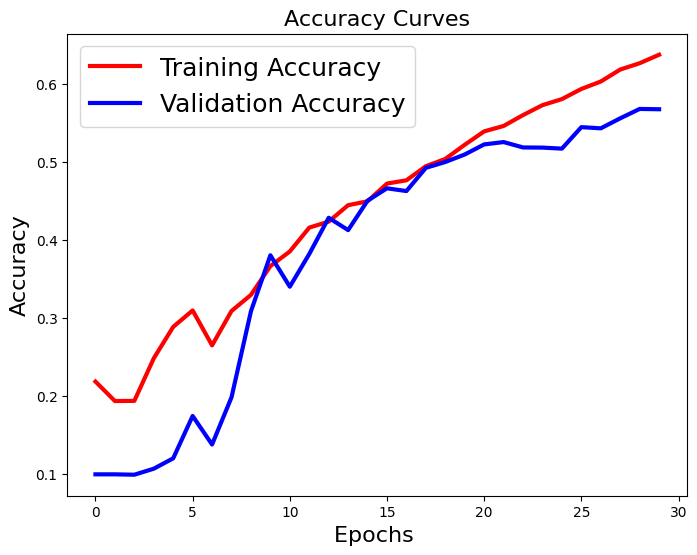

In [ ]:
plot_history(history)

# YOLO

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

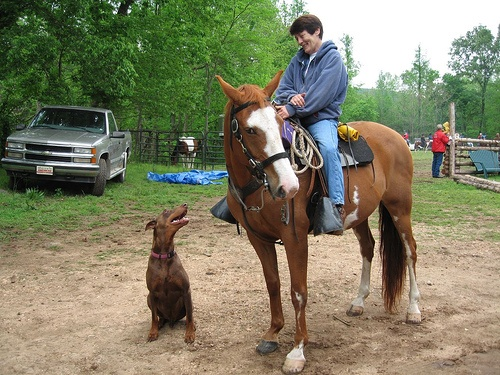

(375, 500, 3)


In [ ]:
img = cv2.imread('ML-datasets/images/horse.jpg')
cv2_imshow(img)
print(img.shape)

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-06-11 15:41:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   102MB/s    in 2.3s    

2023-06-11 15:41:58 (102 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg

--2023-06-11 15:42:09--  https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg
Resolving opencv-tutorial.readthedocs.io (opencv-tutorial.readthedocs.io)... 104.17.32.82, 104.17.33.82, 2606:4700::6811:2152, ...
Connecting to opencv-tutorial.readthedocs.io (opencv-tutorial.readthedocs.io)|104.17.32.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8341 (8.1K) [application/octet-stream]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-06-11 15:42:09 (82.1 MB/s) - ‘yolov3.cfg’ saved [8341/8341]



In [ ]:
#wczytywanie sieci neuronowej
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

layers = net.getLayerNames() #wczytanie warstw
print(len(layers))
print(layers)

254
('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

In [ ]:
#pobrać warstwy niepołączone

ln = [layers[i - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
#przygotowanie wejścia do sieci
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True)

print(blob.shape)


(1, 3, 416, 416)


In [ ]:
net.setInput(blob)
outputs = net.forward(ln)

print(len(outputs))
for out in outputs:
  print(out.shape) #507 dużych propozycji, 2028 średnich propozycji, 8112 małych propozycji

#wektor o długości 85:
#4 wymiary - bounding box - centerX, centerY, szer, wys
#1 poziom zaufania dla całościowego wystąpienia (jest jakiś obiekt)
#80 poziom zaufania dla danej klasy

3
(507, 85)
(2028, 85)
(8112, 85)


In [ ]:
import numpy as np

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
  for detection in output:
    scores = detection[5:]
    classID = np.argmax(scores)
    confidence = scores[classID]
    if confidence > 0.5:
      box = detection[:4] * np.array([w, h, w, h])
      (centerX, centerY, width, height) = box.astype('int')
      x = int(centerX - (width/2))
      y = int(centerY - (height/2))
      boxes.append([x,y,int(width), int(height)])
      confidences.append(float(confidence))
      classIDs.append(classID)

print(len(boxes))

21


In [ ]:
classes = open('ML-datasets/images/coco.names').read().strip().split('\n')
print(classes)
colors = np.random.randint(0, 255, size=(len(classes), 3))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


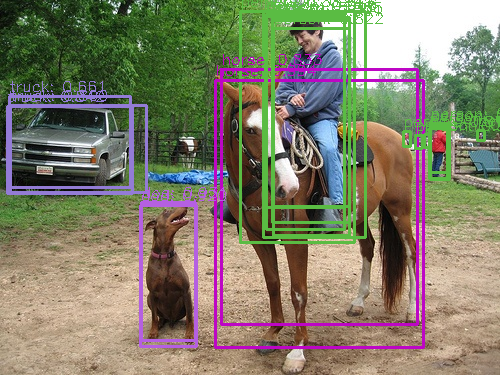

In [ ]:
for i in range(len(boxes)):
  (x, y) = (boxes[i][0], boxes[i][1])
  (w, h) = (boxes[i][2], boxes[i][3])
  color = [int(c) for c in colors[classIDs[i]]]
  cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
  text = "{}: {:.3f}".format(classes[classIDs[i]], confidences[i])
  cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
cv2_imshow(img)

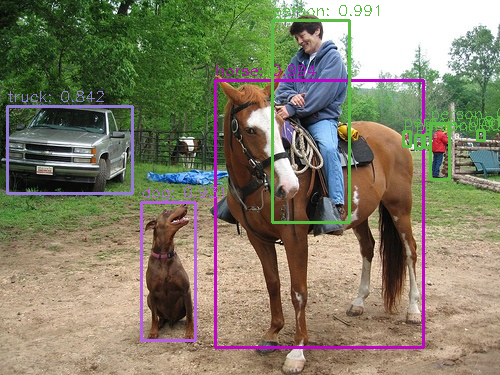

In [ ]:
#NMS
img = cv2.imread('ML-datasets/images/horse.jpg')

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

for i in indices.flatten():
  (x, y) = (boxes[i][0], boxes[i][1])
  (w, h) = (boxes[i][2], boxes[i][3])
  color = [int(c) for c in colors[classIDs[i]]]
  cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
  #print(classes[classIDs[i]])
  text = "{}: {:.3f}".format(classes[classIDs[i]], confidences[i])
  cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
cv2_imshow(img)

# Image augmentation

In [ ]:
# !git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [ ]:
from imgaug import augmenters as iaa 
import imgaug as ia
import cv2
import numpy as np

image = cv2.imread('ML-datasets/images/lena.png')
ia.seed(4)
images = [image, image, image, image]
rotate = iaa.Affine(rotate=(-25, 25)) 
image_aug = rotate(images=images)
for img_aug in image_aug:
  cv2_imshow(img_aug)

Output hidden; open in https://colab.research.google.com to view.

Augmented:


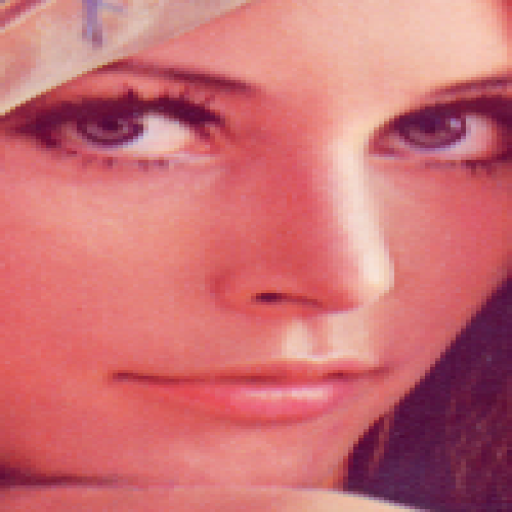

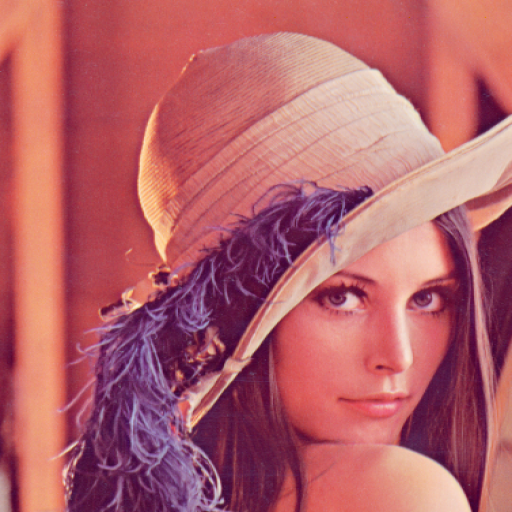

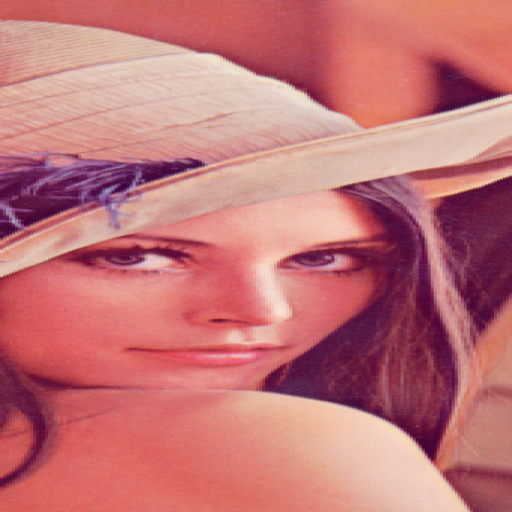

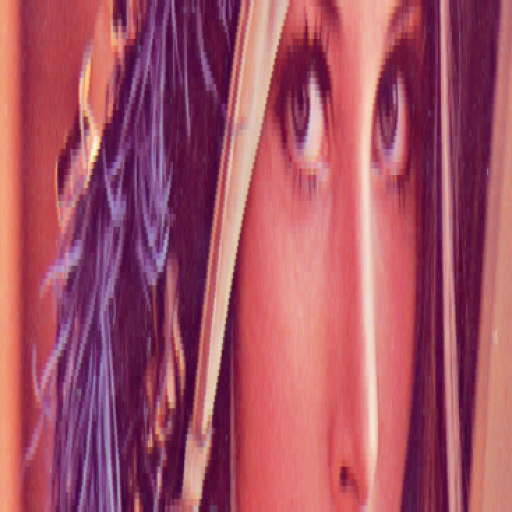

In [ ]:
image = cv2.imread('ML-datasets/images/lena.png')
ia.seed(4)
images = [image, image, image, image]
rotate = iaa.Crop(percent=(0, 0.5))
image_aug = rotate(images=images)
print("Augmented:") 
for img_aug in image_aug:
  cv2_imshow(img_aug)


In [ ]:
 # Sekwencje
images = [image, image, image, image]
seq = iaa.Sequential([ iaa.Affine(rotate=(-25, 25)), iaa.AdditiveGaussianNoise(scale=(10, 60)), iaa.Crop(percent=(0, 0.2))
])
images_aug = seq(images=images)
print("Augmented:") 
for img_aug in images_aug:
  cv2_imshow(img_aug)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
 # Sometimes

images = [image, image, image, image] 
def sometimes(aug):
  return iaa.Sometimes(0.5, aug)
seq = iaa.Sequential([sometimes(iaa.Affine(rotate=(-25, 25)))])
images_aug = seq(images=images)
print("Augmented:") 
for img_aug in images_aug:
  cv2_imshow(img_aug)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#iaa.OneOf
image = cv2.imread('ML-datasets/images/lena.png')

images = [image, image, image, image]
seq = iaa.OneOf([
   iaa.Affine(rotate=45),
   iaa.AdditiveGaussianNoise(scale=0.2*255),
   iaa.Add(50, per_channel=True),
   iaa.Sharpen(alpha=0.5)
])
images_aug = seq(images=images)
print("Augmented:")
for img_aug in images_aug:
  cv2_imshow(img_aug)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# klasa generatora

import keras
import numpy as np
import imgaug.augmenters as iaa
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, images, labels, batch_size=64, 
               shuffle=False, augment=False):
    self.labels = labels                    # array of labels
    self.images = images                    # array of images
    self.batch_size = batch_size            # batch size
    self.shuffle = shuffle                  # shuffle bool
    self.augment = augment                  # augment data bool
    self.on_epoch_end()

  def __len__(self):
    'Denotes the number of batches per epoch'
    return int(np.floor(len(self.images) / self.batch_size))

  def on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = np.arange(len(self.images))
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __getitem__(self, index):
    'Generate one batch of data'
    # selects indices of data for next batch
    indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

    # select data and load images
    labels = np.array([self.labels[k] for k in indexes])
    images = np.array([self.images[k] for k in indexes])

    # preprocess and augment data
    if self.augment == True:
      images = self.augmentor(images)

    # images=images/255
    return images, labels


  def augmentor(self, images):
    'Apply data augmentation'
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    list_of_aumgenters = []
    list_of_aumgenters.extend([sometimes(iaa.Crop(px=(1, 16), keep_size=True)),
                              sometimes(iaa.Fliplr(0.5)),
                              sometimes(iaa.GaussianBlur(sigma=(0, 3.0)))])
    
    seq = iaa.Sequential(list_of_aumgenters)
  
    return seq.augment_images(images)




In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

# 0-255 to 0-1
train_x = train_x/255 
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = tf.keras.utils.to_categorical(train_y) 
test_y_one_hot = tf.keras.utils.to_categorical(test_y)

170498071/170498071 [==============================] - 23s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

#budowa modelu
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same',
                 input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#kompilacja modelu
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
generator = DataGenerator(images=train_x, labels=train_y_one_hot,
                         batch_size=64, shuffle=True, augment=False)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3)

history_without_augment = model.fit(generator, epochs=10,verbose=True,
                             validation_data=(test_x, test_y_one_hot))
                             #callbacks = [es])

Epoch 1/10
781/781 [==============================] - 8s 10ms/step - loss: 0.9670 - accuracy: 0.6588 - val_loss: 0.9161 - val_accuracy: 0.6799
Epoch 2/10
781/781 [==============================] - 7s 9ms/step - loss: 0.8094 - accuracy: 0.7129 - val_loss: 0.8581 - val_accuracy: 0.7016
Epoch 3/10
781/781 [==============================] - 8s 10ms/step - loss: 0.6880 - accuracy: 0.7593 - val_loss: 0.8000 - val_accuracy: 0.7263
Epoch 4/10
781/781 [==============================] - 7s 9ms/step - loss: 0.6013 - accuracy: 0.7884 - val_loss: 0.8122 - val_accuracy: 0.7256
Epoch 5/10
781/781 [==============================] - 8s 10ms/step - loss: 0.5215 - accuracy: 0.8169 - val_loss: 0.8154 - val_accuracy: 0.7336
Epoch 6/10
781/781 [==============================] - 8s 10ms/step - loss: 0.4462 - accuracy: 0.8415 - val_loss: 0.7857 - val_accuracy: 0.7436
Epoch 7/10
781/781 [==============================] - 7s 9ms/step - loss: 0.3999 - accuracy: 0.8592 - val_loss: 0.8644 - val_accuracy: 0.7338
Ep

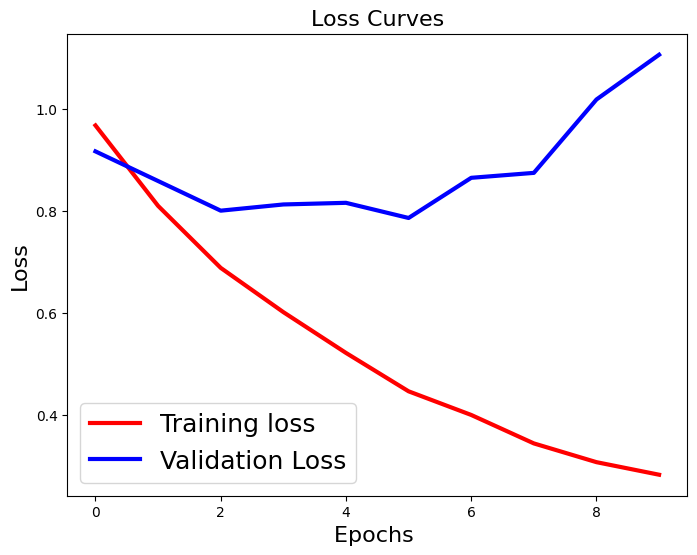

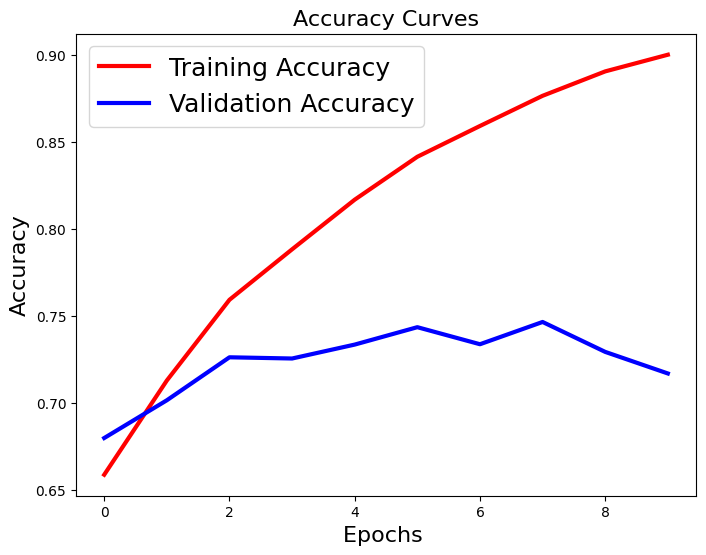

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
 
plot_history(history_without_augment)


In [ ]:
generator = DataGenerator(images=train_x, labels=train_y_one_hot,
                         batch_size=64, shuffle=True, augment=True)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3)

history_with_augment = model.fit_generator(generator, epochs=10,verbose=True,
                             validation_data=(test_x, test_y_one_hot))
                             #callbacks = [es])

Epoch 1/10
  3/781 [..............................] - ETA: 21s - loss: 1.3384 - accuracy: 0.5781

<ipython-input-43-bd28ad2d6724>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_with_augment = model.fit_generator(generator, epochs=10,verbose=True,


781/781 [==============================] - 16s 21ms/step - loss: 1.2841 - accuracy: 0.5483 - val_loss: 0.8641 - val_accuracy: 0.7112
Epoch 2/10
781/781 [==============================] - 15s 20ms/step - loss: 1.2427 - accuracy: 0.5593 - val_loss: 0.8193 - val_accuracy: 0.7324
Epoch 3/10
781/781 [==============================] - 15s 20ms/step - loss: 1.2137 - accuracy: 0.5695 - val_loss: 0.8331 - val_accuracy: 0.7387
Epoch 4/10
781/781 [==============================] - 17s 22ms/step - loss: 1.1999 - accuracy: 0.5777 - val_loss: 0.8022 - val_accuracy: 0.7425
Epoch 5/10
781/781 [==============================] - 16s 21ms/step - loss: 1.1744 - accuracy: 0.5847 - val_loss: 0.7757 - val_accuracy: 0.7471
Epoch 6/10
781/781 [==============================] - 16s 20ms/step - loss: 1.1703 - accuracy: 0.5881 - val_loss: 0.8283 - val_accuracy: 0.7379
Epoch 7/10
781/781 [==============================] - 16s 20ms/step - loss: 1.1575 - accuracy: 0.5889 - val_loss: 0.7751 - val_accuracy: 0.7382
Epo

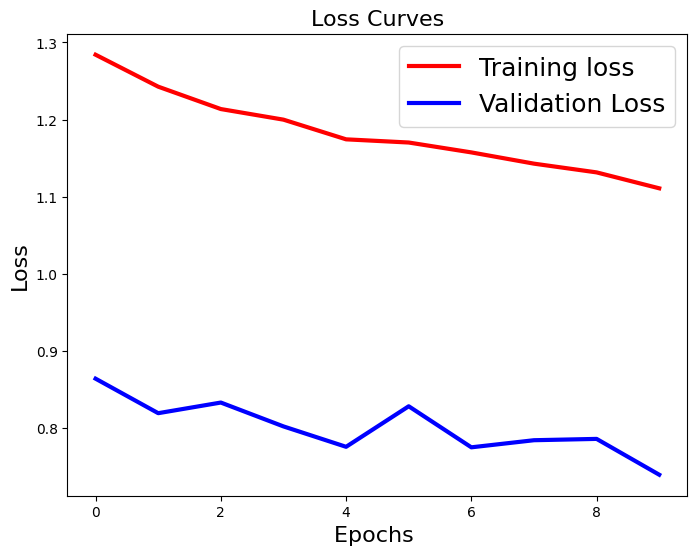

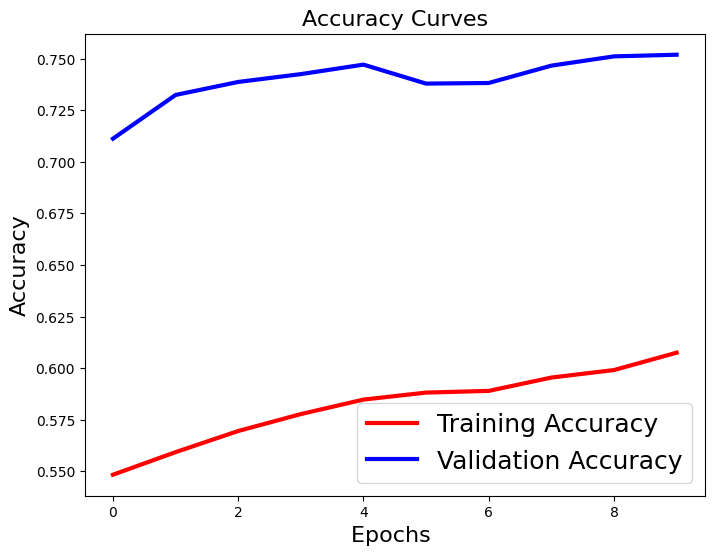

In [ ]:
plot_history(history_with_augment)

# Transfer learning

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import UpSampling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

efficient_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_test = x_test/255
print(x_test.shape)
# Change the labels from integer to categorical data
train_y_one_hot = tf.keras.utils.to_categorical(y_train)
test_y_one_hot = tf.keras.utils.to_categorical(y_test)

169001437/169001437 [==============================] - 5s 0us/step
(10000, 32, 32, 3)


In [ ]:
model = Sequential()
model.add(efficient_model)
model.add(GlobalAveragePooling2D ()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(.25)) 
model.add(BatchNormalization())
num_classes = 100
model.add(Dense(num_classes, activation='softmax'))

for layer in efficient_model.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True 
  else:
    layer.trainable = False

In [ ]:
generator = DataGenerator(images=x_train, labels=train_y_one_hot, batch_size=64, 
                          shuffle=True, augment=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   verbose=1, patience=2)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(generator, epochs=50, verbose=True,
                              validation_data=(x_test, test_y_one_hot),
                              callbacks =[es])

Epoch 1/50


<ipython-input-47-f4cc79c3cad4>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator, epochs=50, verbose=True,


781/781 [==============================] - 96s 57ms/step - loss: 4.3088 - accuracy: 0.0793 - val_loss: 4.7669 - val_accuracy: 0.0100
Epoch 2/50
781/781 [==============================] - 40s 52ms/step - loss: 3.6951 - accuracy: 0.1515 - val_loss: 4.7134 - val_accuracy: 0.0100
Epoch 3/50
781/781 [==============================] - 39s 50ms/step - loss: 3.4433 - accuracy: 0.1894 - val_loss: 4.7163 - val_accuracy: 0.0109
Epoch 4/50
781/781 [==============================] - 42s 54ms/step - loss: 3.2847 - accuracy: 0.2125 - val_loss: 4.8161 - val_accuracy: 0.0129
Epoch 4: early stopping
